# 作业目标
### 请根据附件中的IRIS数据库，从每类50个样本中的提取前40个样本作为训练集，剩余10个作为测试集。对样本的每个特征进行直方图概率密度估计，根据估计结果，构建朴素贝叶斯分类器，分别对训练数据和测试数据进行分类，并给出分类错误的样本。

### 解题要求：

#### 1）画出每类在每个特征上的分布直方图(纵轴为样本数量)，要求bin的宽度为1厘米。

#### 2）给出基于直方图计算的概率估计表，每个类别的每个特征用一行来记录，共12行；

#### 3）给出朴素贝叶斯分类器在测试数据（共30个）上的概率估计与分类结果，用表格表示，共30行，5列，30行对应30个测试样本（排序按照附件中剩余测试样本的先后顺序），前3列记录该样本对应于3类的类条件概率，精度保持到小数点后2位；第4列记录该样本基于NBC分类器的分类结果；第4列记录该样本的真实类别。

### 上述提交内容中的图片可直接复制在答题窗口；表格请使用一个excel文件作为附件提交，两个表格分别放在excel文件中的两个sheet；文件命名为“学号-姓名”，例如“1234567-周星驰”

%%cmd
pip install watermark -i http://pypi.douban.com/simple --trusted-host pypi.douban.com
    #注释必须写在魔法命令的后面

# 配置环境

In [1]:
%load_ext watermark
%watermark -a "14172" -d -v -m -p numpy,pandas,matplotlib,scipy,sklearn
#查看信息

14172 2021-04-07 

CPython 3.6.12
IPython 7.16.1

numpy 1.19.5
pandas 1.1.3
matplotlib 3.3.4
scipy 1.5.4
sklearn 0.0

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 94 Stepping 3, GenuineIntel
CPU cores  : 4
interpreter: 64bit


In [2]:
#環境配製
#這個號機車耶LOL
import random
import numpy as np
import pandas as pd
from math import e
from math import pow
from sklearn import datasets
import torch
DATA_PATH = './iris/'
from sklearn.model_selection import train_test_split #对数据集进行切分
from sklearn.naive_bayes import MultinomialNB  # 朴素贝叶斯网络模型

In [3]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier

In [4]:
iris=datasets.load_iris()
print(iris.data)
print("分隔符--------------------------")
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [5]:
#圖形化數據
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('fivethirtyeight')

# 数据载入、可视化分析

### 画出每类在每个特征上的分布直方图(纵轴为样本数量)，要求bin的宽度为1厘米

In [6]:
#數據幾導入
df = pd.read_csv(DATA_PATH + 'iris.csv')

In [7]:
# 讀取數據頭
df.head()
#注意到计数器和unnamed lable有 1 的距离

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [8]:
#随机读取5条数据
df.sample(5)
#需要把四个特征组成向量 量化species

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
57,58,4.9,2.4,3.3,1.0,versicolor
99,100,5.7,2.8,4.1,1.3,versicolor
23,24,5.1,3.3,1.7,0.5,setosa
61,62,5.9,3.0,4.2,1.5,versicolor
14,15,5.8,4.0,1.2,0.2,setosa


In [9]:
#查勘數據詳細信息 有无missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


F:\0software\Anaconda\envs\pytorch2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



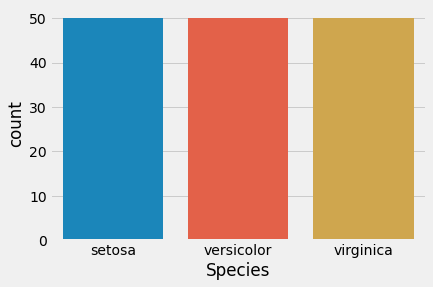

In [10]:
# print("物种数：")
df['Species'].value_counts()

#f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot('Species',data=df)
#ax.set_title('Iris Species Count')
plt.show()

In [11]:
# stats 数据分析
df.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


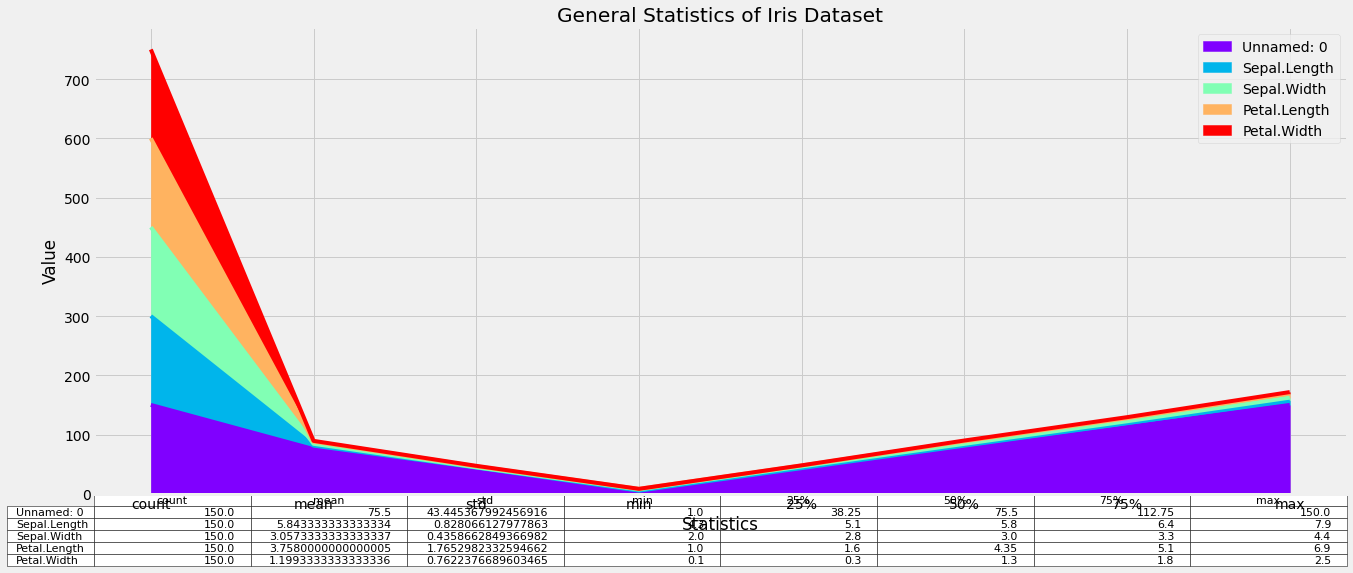

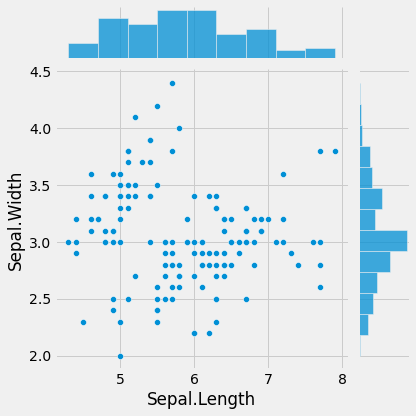

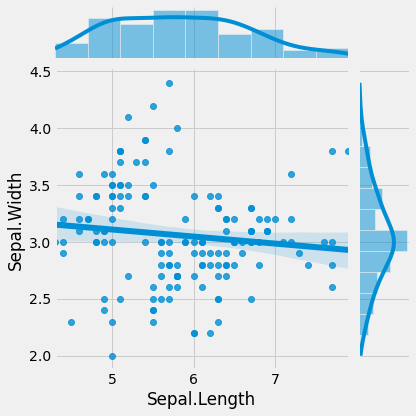

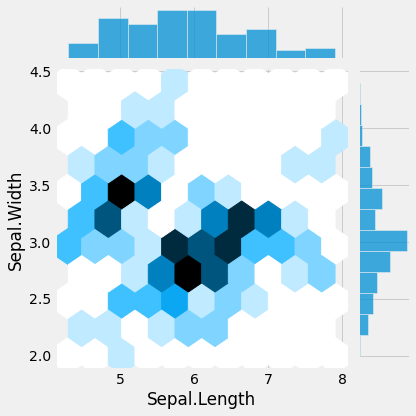

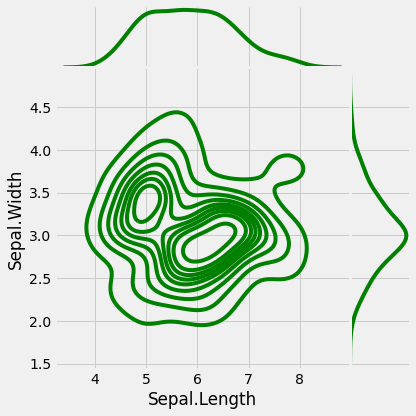

In [12]:
df.describe().plot(kind = "area", figsize = (20,8), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of Iris Dataset")

fig=sns.jointplot(x='Sepal.Length',y='Sepal.Width',data=df)
sns.jointplot(x='Sepal.Length',y='Sepal.Width',data=df, kind="reg")
sns.jointplot(x='Sepal.Length',y='Sepal.Width',data=df, kind='hex')
sns.jointplot(x='Sepal.Length',y='Sepal.Width',data=df, kind="kde",space=0,color='g')
#Unnamed: 0	Sepal.Length	Sepal.Width	Petal.Length	Petal.Width	Species


# 数据预处理

Unnamed: 0	Sepal.Length	Sepal.Width	Petal.Length	Petal.Width	Species
得把标签化为

In [13]:
#从样本构建特征集,载入特征和标签集.在进行机器学习之前，将数据集拆分为训练和测试数据集。
#首先，使用标签编码将 3 种鸢尾花的品种名称转换为分类值（0, 1, 2）
X = df[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
y = df['Species']

In [14]:
# 对标签集进行编码
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(X,y)
type(X)

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

pandas.core.frame.DataFrame

##train_test_split参数解释：
train_data：待划分样本数据
train_target：待划分样本数据的结果（标签）
test_size：测试数据占样本数据的比例，若整数则样本数量
random_state：设置随机数种子，保证每次都是同一个随机数。若为0或不填，则每次得到数据都不一样
train, test = train_test_split(data_all, test_size=0.2, random_state=10)

In [15]:
#使用sklearn 随机的划分数据集，用于对比
train_X_random, test_X_random, train_y_random, test_y_random = train_test_split(X, y, test_size = 0.3, random_state = 101)
print(train_X_random.shape, train_y_random.shape, test_X_random.shape, test_y_random.shape)

(105, 4) (105,) (45, 4) (45,)


https://blog.csdn.net/qq_33873431/article/details/98077676
需要 ndarray 转换为 pandas.core 才能使用 head 和 tail 

In [16]:
#train_X = np.array_split(X, 2, axis=119)  
#水平轴分割， b为list，元素值为array 用不了！？
y = pd.Series(y.tolist())
print("y的性质")
type(y)
y

y的性质


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int64

In [17]:
print("X性质")
type(X)

X性质


pandas.core.frame.DataFrame

#手工切分，忽略了样本均匀等，效果差
train_X = X.head(120)
test_X  = X.tail(30)
train_y = y.head(120)
test_y  = y.tail(30)

## 每类50个样本中的提取前40个样本作为训练集，剩余10个作为测试集

## 问题：数据合并方式有什么去别

In [18]:
#数据划分
train_X_0 = X[0:40]
train_X_1 = X[50:90]
train_X_2 = X[100:140]

train_y_0 = y[0:40]
train_y_1 = y[50:90]
train_y_2 = y[100:140]
#print(train_y_2)

#注意，append()会重新创建索引和数据缓存。
temp = train_y_0.append(train_y_1)
Train_y = temp.append(train_y_2)

temp = train_X_0.append(train_X_1)
Train_X = temp.append(train_X_2)


In [19]:
#验证划分
test_X_0 = X[40:50]
test_X_1 = X[90:100]
test_X_2 = X[140:150]

test_y_0 = y[40:50]
test_y_1 = y[90:100]
test_y_2 = y[140:150]
#print(train_y_2)

#注意，append()会重新创建索引和数据缓存。
temp = test_y_0.append(test_y_1)
test_y = temp.append(test_y_2)

temp = test_X_0.append(test_X_1)
test_X = temp.append(test_X_2)
print(test_X)

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
40            5.0          3.5           1.3          0.3
41            4.5          2.3           1.3          0.3
42            4.4          3.2           1.3          0.2
43            5.0          3.5           1.6          0.6
44            5.1          3.8           1.9          0.4
45            4.8          3.0           1.4          0.3
46            5.1          3.8           1.6          0.2
47            4.6          3.2           1.4          0.2
48            5.3          3.7           1.5          0.2
49            5.0          3.3           1.4          0.2
90            5.5          2.6           4.4          1.2
91            6.1          3.0           4.6          1.4
92            5.8          2.6           4.0          1.2
93            5.0          2.3           3.3          1.0
94            5.6          2.7           4.2          1.3
95            5.7          3.0           4.2          1.2
96            

```python

#temp = pd.concat([Train_y,Train_X],join_axes=[Train_y.columns])
print(temp)
#合并？？
#Train_X = [[train_X_0, train_X_1, train_X_2]]
#Train_X

```

## 数据的对样本的每个特征进行直方图概率密度估计，根据估计结果，构建朴素贝叶斯分类器

df['Species']
Unnamed: 0  	Sepal.Length	Sepal.Width 	 Petal.Length	 Petal.Width  	Species

data：绘制直方图的数据
bins：参数宜设为整数，用于调整区间数目
density：如果为True，返回的纵轴值是归一化后的结果；如果为‘False’，返回的纵轴值是实际频数。
alpha：调整图形的透明度。
histtype：绘制的直方图类型，有‘bar’，‘barstacked’，‘step’，‘stepfilled’四种选项。
color设置直方图颜色。
edgecolor：设置边缘颜色。

# 定义一个间隔大小
#a = 10
# 得出组数
#bins = int( (max(df['Sepal.Length']) - min(df['Sepal.Length'])) / a )
#bins = int(7.9-4.3)
# 画出直方图plt.hist(df.Species, bins, normed=1)
#plt.hist(df['Sepal.Length'],bins)
#bins = int((7.9-4.3)/a)
#plt.hist(df['Sepal.Length'],bins)
plt.hist(df['Sepal.Length']，bins=1 )

<AxesSubplot:>

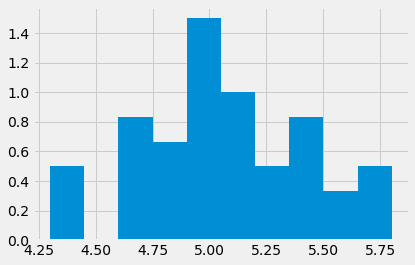

In [29]:
#names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']  
#train_X_0['Sepal.Length'].hist(density = True) #数据直方图histograms
#print(train_X_0)

# 构建朴素贝叶斯

## 手动直接分割的结果

In [3]:
clf = sklearn.naive_bayes.MultinomialNB()  # 建立朴素贝叶斯网络
clf.fit(Train_X, Train_y)  # 带入训练集训练模型
pre = clf.predict(test_X)  # 预测测试集中特征矩阵所属的类别
print('预测集标签')
print(test_y)
print('预测结果',pre)
print('数据格式',type(pre))


NameError: name 'sklearn' is not defined

In [ ]:
print('GaussianNB Training Score: %.2f' % clf.score(Train_X, Train_y))
print('GaussianNB Testing Score: %.2f' % clf.score(test_X, test_y))

In [25]:
#MultinomialNB().estimator.get_params().keys()


#学习后模型中的一些参数
clf.set_params(priors=[0.333, 0.333, 0.333])#这里要设一下各个类标记对应的先验概率，如果不设置直接clf.priors返回的是None(不知道为什么？)
print(clf.priors)                           #获取各个类标记对应的先验概率
print(clf.class_prior_ )                    #同priors一样，都是获取各个类标记对应的先验概率，区别在于priors属性返回列表，class_prior_返回的是数组
print(clf.get_params(deep=True))            #返回priors与其参数值组成字典
 
print(clf.class_count_)                     #获取各类标记对应的训练样本数
print(clf.theta_)                           #获取各个类标记在各个特征上的均值
print(clf.sigma_)                           #获取各个类标记在各个特征上的方差

In [ ]:
## random分的结果

In [27]:
clf = MultinomialNB()  # 建立朴素贝叶斯网络
clf.fit(train_X_random, train_y_random)  # 带入训练集训练模型
pre = clf.predict(test_X_random)  # 预测测试集中特征矩阵所属的类别
print('预测集标签')
print(test_y_random)
print('预测结果')
print(pre)


预测集标签
[0 0 0 2 1 2 1 1 2 0 2 0 0 2 2 1 1 1 0 2 1 0 1 1 1 1 1 2 0 0 2 1 2 1 2 1 1
 1 1 2 0 0 0 1 1]
预测结果
[0 0 0 2 2 2 2 2 2 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2
 2 2 2 0 0 0 2 2]


In [1]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest) # 进行预测
cls = naive_bayes.GaussianNB()
    cls.fit(Train_X, Train_y)
     print('GaussianNB Training Score: %.2f' % cls.score(X_train, y_train))
    print('GaussianNB Testing Score: %.2f' % cls.score(X_test, y_test))

NameError: name 'Xtrain' is not defined

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

In [2]:
cls = naive_bayes.GaussianNB()
    cls.fit(Train_X, Train_y)
     print('GaussianNB Training Score: %.2f' % cls.score(X_train, y_train))
    print('GaussianNB Testing Score: %.2f' % cls.score(X_test, y_test))

IndentationError: unexpected indent (<ipython-input-2-0b7117784fd0>, line 2)